<a href="https://colab.research.google.com/github/abenfaddoul/scikit-learn/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-Learn: Machine Learning in Python

Scikit-Learn is used for data mining, data analysis, and model building.

>Scikit-Learn is built on NumPy, SciPy, and Matplotlib


What Can we Achieve using Python Scikit-Learn?

1. Classification:
Identifying which category an object belongs to.
Application: Spam detection

2. Regression:
Predicting a continuous variable based on relevant independent variables.
Application: Stock price predictions

3. Clustering:
Automatic grouping of similar objects into different clusters.
Application: Customer segmentation

# Introduction

>  We will use a dataset provided on Kaggle with data indicating water quality, to build a classification model using the K-Nearest Neighbors (KNN) algorithm in order to predict whether water with certain presented parameters is safe or not.




# Importing Necessary Libraries and Data Set   

In [95]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [96]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mssmartypants/water-quality")

In [97]:
data = pd.read_csv(path+"/waterQuality1.csv")

# Data Preprocessing

In [98]:
data.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [99]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [101]:
# checking for non-numeric
non_numeric_columns = data.columns[data.apply(
    lambda col: pd.to_numeric(col, errors='coerce').isna().any())
                                  ]
# Print the columns
print("Columns containing non-numeric values:", non_numeric_columns.tolist())

Columns containing non-numeric values: ['ammonia', 'is_safe']


In [102]:
# Loop through each column to find non-numeric values
for column in data.columns:
    # Identify non-numeric values in the column
    non_numeric_values = data[column][pd.to_numeric(data[column], errors='coerce').isna()]

    # If there are any non-numeric values, print the column name and the unique non-numeric values
    if not non_numeric_values.empty:
        print(f"Non-numeric values in column '{column}': {non_numeric_values.unique()}")

Non-numeric values in column 'ammonia': ['#NUM!']
Non-numeric values in column 'is_safe': ['#NUM!']


In [103]:
# let us replace non-numeric values with 0
data  = data.replace('#NUM!',0)

In [104]:
# lets convert the datatypes of is_safe and ammonia to integer and float respectively
data['ammonia'] = data['ammonia'].astype(float)
data['is_safe'] = data['is_safe'].astype(int)

In [105]:
# check  null values
data.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


# EDA (Exploratory Data Analysis)

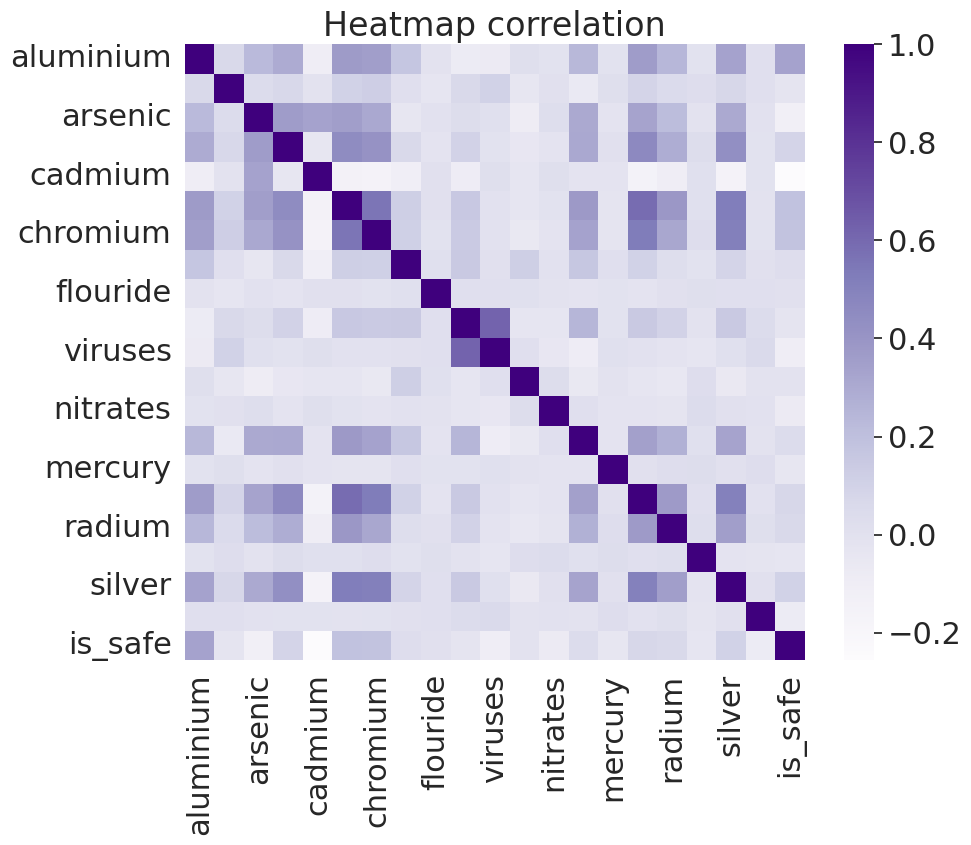

In [106]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="Purples") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

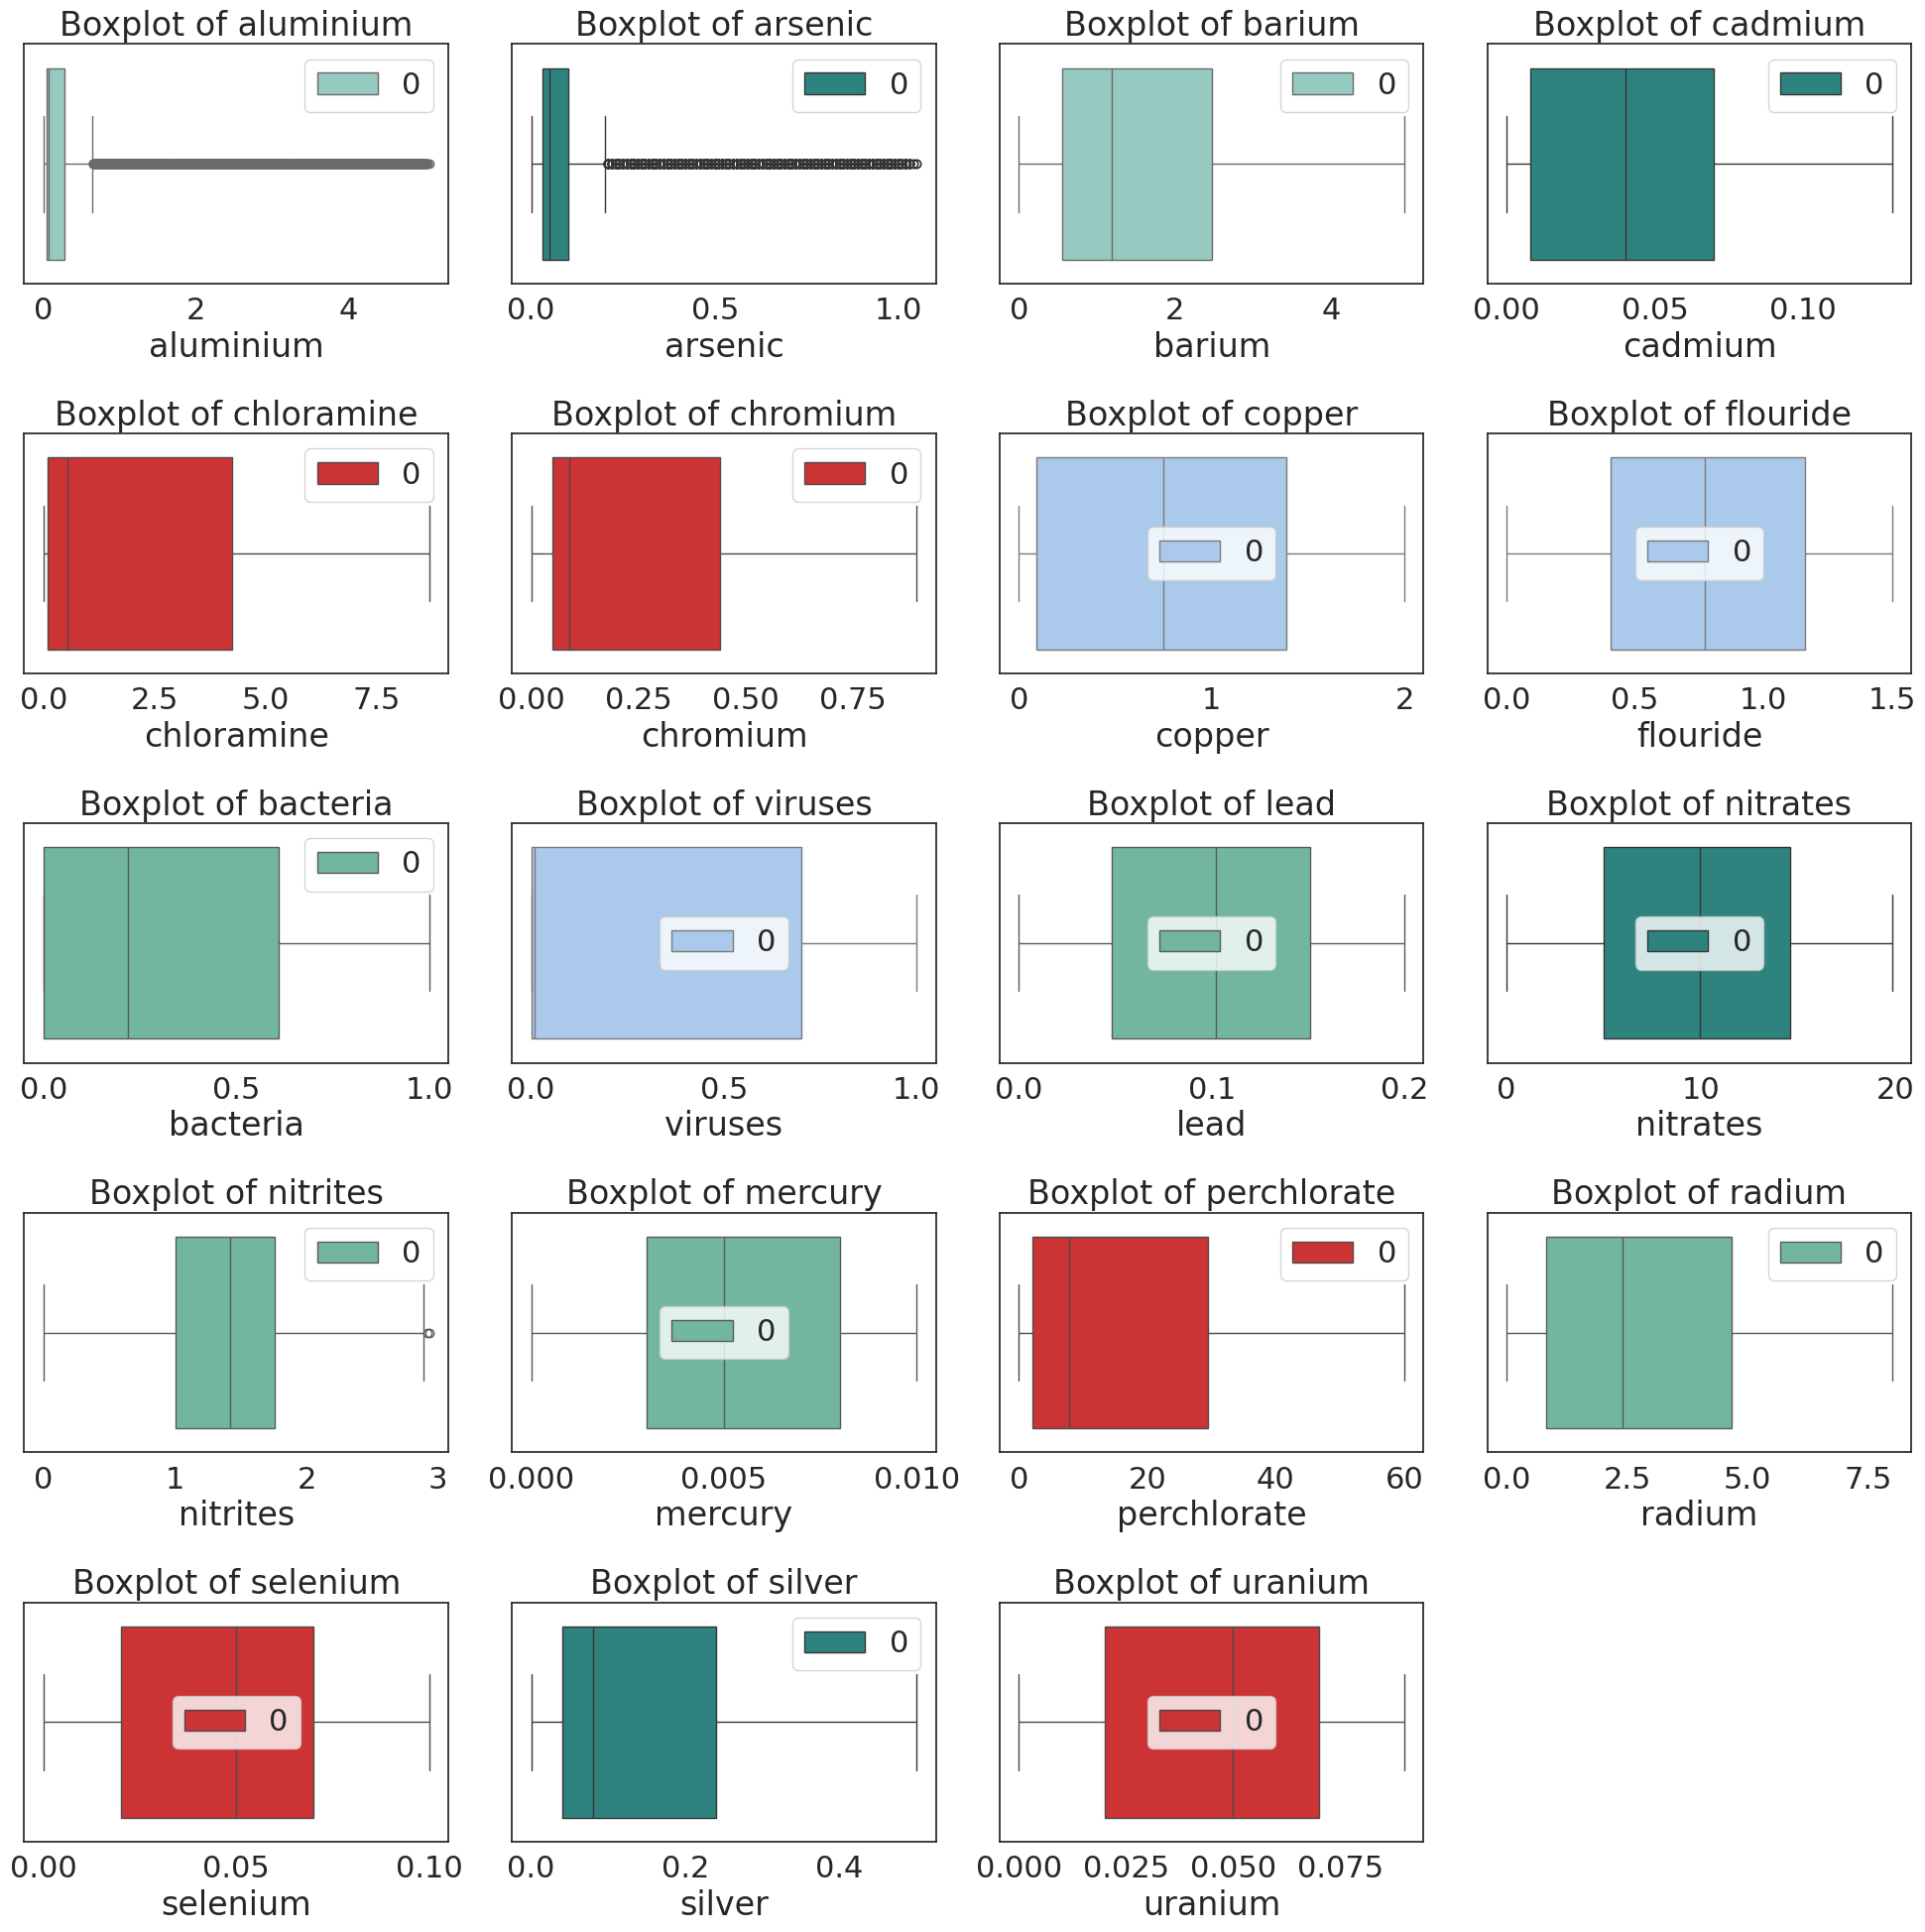

In [107]:
columns  = ['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','bacteria','viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium']
num_rows = 5
num_cols = 4

# Set up the plotting area with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()  # Flatten to easily iterate over all subplots
colors = ['Set1','Set2','Set3','pastel','viridis']
# Loop through each column and plot a boxplot in each grid cell
for i, col in enumerate(columns):
    sns.boxplot(data=data, x=col, ax=axes[i], hue=0, palette = random.choice(colors))
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots (if the grid has more cells than columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



>  upon analysing there are outliers in the aluminium and arseni.
  In order to handle these outliers we gonna  use  log transformation and standardization



# Splitting the data into training and test sets

In [108]:
X = data.drop(["is_safe"], axis=1)
y = data["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Preprocessing Data: We gonna standardize the range of input representing data features, which makes the model performance more realistic.

In [109]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters

In [110]:
hyperparameters = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13]}

In [111]:
pipeline = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=11))

In [112]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=11),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

# Cross-Validation

In [113]:
clf = GridSearchCV(pipeline, hyperparameters, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=11))]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                               13]})

# Evaluate The Model

In [114]:
y_pred = clf.predict(X_test)
print('r2_score: ', r2_score(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))

r2_score:  0.18783614129171256
mean_squared_error:  0.081875


trainning accuracy = 0.9226441631504922
testing accuracy = 0.918125
precision score = 0.84
recall score = 0.34615384615384615
 f1-score = 0.490272373540856
roc_auc = 0.6688456113702941


Text(0.5, 1.0, 'Confusion Matrix: K-Nearest Neighbors')

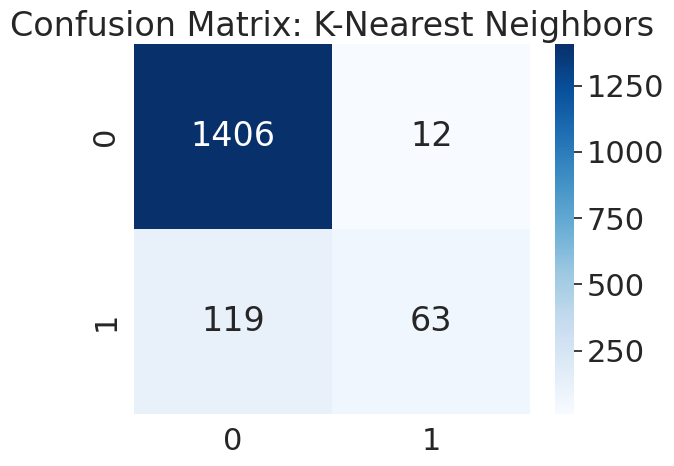

In [115]:

y_predknn = clf.predict(X_test)
y_knntr = clf.predict(X_train)
print(f'trainning accuracy = {accuracy_score(y_train,y_knntr)}')
print(f'testing accuracy = {accuracy_score(y_test,y_predknn)}')
print(f'precision score = {precision_score(y_test,y_predknn)}')
print(f'recall score = {recall_score(y_test,y_predknn)}')
print(f' f1-score = {f1_score(y_test,y_predknn)}')
print(f'roc_auc = {roc_auc_score(y_test,y_predknn)}')
sns.heatmap(confusion_matrix(y_test,y_predknn),annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix: K-Nearest Neighbors')